# Linear Regression 

## import library

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
import util

## load point data for training $(x, y, z) \in \mathbb{R}^3$ 

In [2]:
fname_data  = '07_data.csv'
data        = np.genfromtxt(fname_data, delimiter=',')
num_data    = data.shape[0]

x = np.zeros(num_data)
y = np.zeros(num_data)
z = np.zeros(num_data)

for i in range(num_data):
    x[i] = data[i,0]
    y[i] = data[i,1]
    z[i] = data[i,2]

x = np.reshape(x, (num_data, 1))
y = np.reshape(y, (num_data, 1))
z = np.reshape(z, (num_data, 1))


## visualize the projection of the three dimensional points to the $xy$-plane

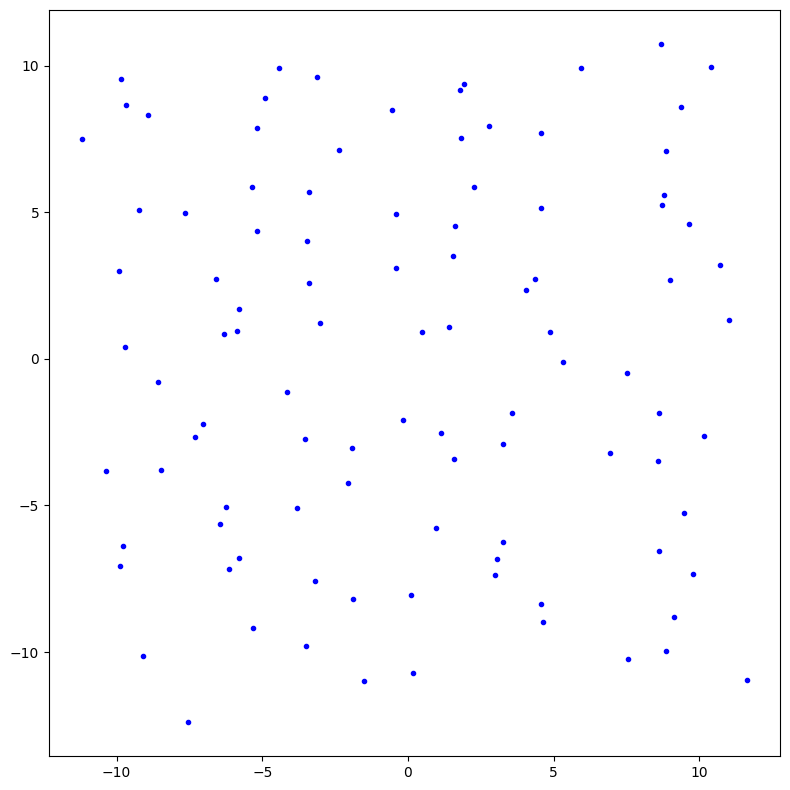

In [3]:
plt.figure(figsize=(8,8))
plt.plot(x, y, '.', color = 'blue')
plt.tight_layout()
plt.show()

## visualize the data points in the three dimensional space

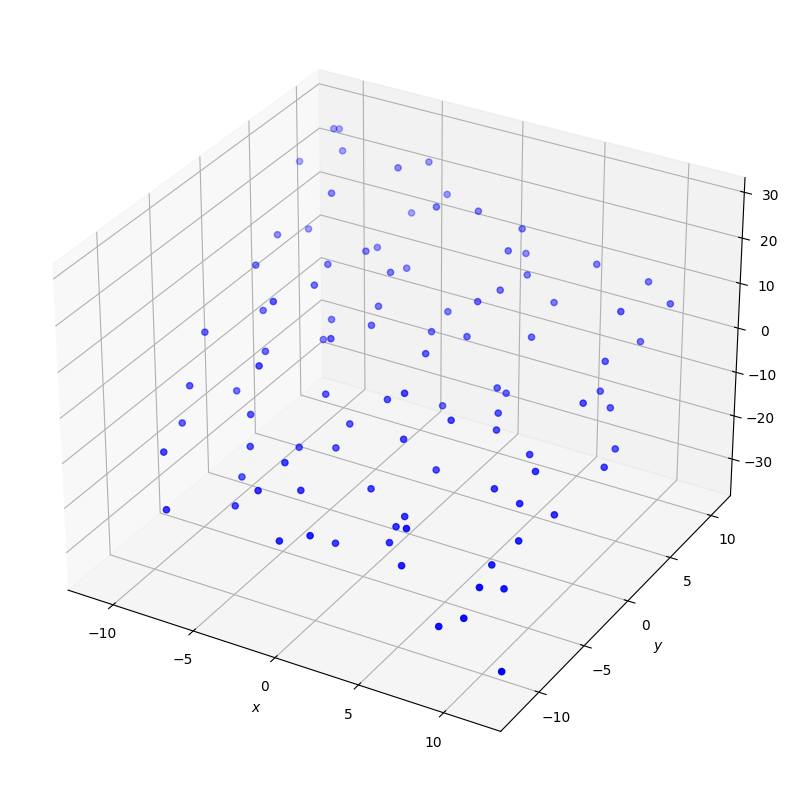

In [4]:
fig = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(111, projection='3d')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')
ax1.scatter(x, y, z, marker='o', color='blue')
plt.tight_layout()
plt.show()

In [5]:
print('num of x =', len(x))
print('num of y =', len(y))
print('num of z =', len(z))

num of x = 100
num of y = 100
num of z = 100


## construct matrix $A$ as given by:
$$
A =
\begin{bmatrix}
1 & x_{1} & y_{1}\\
1 & x_{2} & y_{2}\\
\vdots & \vdots & \vdots \\
1 & x_{n} & y_{n}
\end{bmatrix},
\quad
\theta =
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\theta_{2}
\end{bmatrix},
\quad
z =
\begin{bmatrix}
z_{1} \\
z_{2} \\
\vdots \\
z_{n}
\end{bmatrix}
$$

## solve the linear regression problem by the gradient descent algorithm

In [6]:
lr          = 0.01
num_iter    = 500
theta       = np.zeros((3, 1))
loss_iter   = []
theta0_iter = []
theta1_iter = []
theta2_iter = []

for i in range(num_iter):
    A       = util.get_matrix_A_linear_regression(x, y)
    grad    = util.compute_gradient(A, z, theta)
    theta   = theta - lr * grad
    loss    = util.compute_loss(A, z, theta)
    loss_iter.append(loss.item())
    theta0_iter.append(theta[0].item())
    theta1_iter.append(theta[1].item())
    theta2_iter.append(theta[2].item())

In [7]:
def plot_01():
    plt.figure(figsize=(8,4))
    plt.plot(loss_iter)
    plt.tight_layout()
    plt.show()
    print('loss sum =', sum(loss_iter))

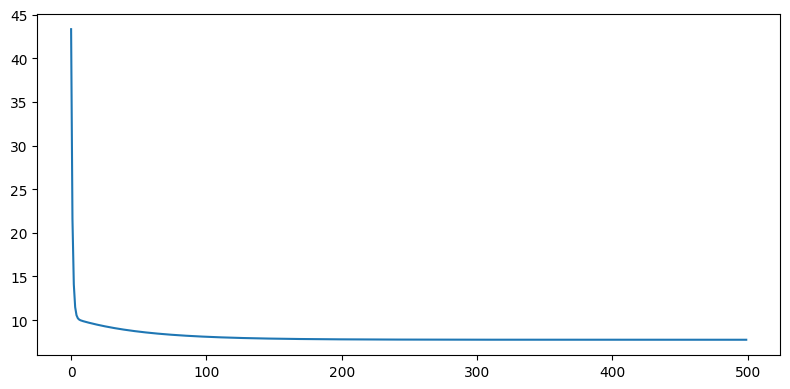

loss sum = 4053.4995897447566


In [8]:
plot_01()

In [9]:
def plot_02():
    plt.figure(figsize=(8,4))
    plt.plot(theta0_iter, '-', color='red', label=r'$\theta_0$')
    plt.plot(theta1_iter, '-', color='green', label=r'$\theta_1$')
    plt.plot(theta2_iter, '-', color='blue', label=r'$\theta_2$')
    plt.xlabel('iter')
    plt.legend()
    plt.tight_layout()
    plt.show()
    print('sum theta0 =', sum(theta0_iter))
    print('sum theta1 =', sum(theta1_iter))
    print('sum theta2 =', sum(theta2_iter))


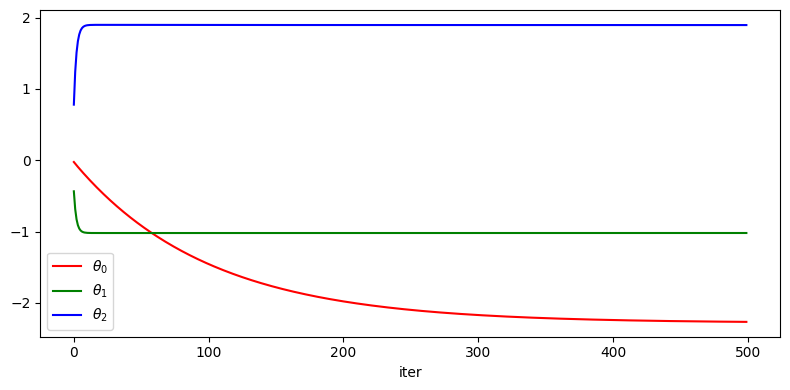

sum theta0 = -916.4012597089699
sum theta1 = -508.5148336164769
sum theta2 = 945.6099519418051


In [10]:
plot_02()

In [11]:
def plot_03():
    XX = np.linspace(-15, 15, 10)
    YY = np.linspace(-15, 15, 10)
    (grid_XX, grid_YY) = np.meshgrid(XX, YY)
    grid_ZZ = theta[0] + theta[1] * grid_XX + theta[2] * grid_YY

    fig = plt.figure(figsize=(8, 8))
    ax1 = plt.subplot(111, projection='3d')
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$y$')
    ax1.set_zlabel('$z$')
    ax1.plot_surface(grid_XX, grid_YY, grid_ZZ, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.5)
    ax1.scatter(x, y, z, marker='o', color='blue')
    plt.tight_layout()
    plt.show()
    print('sum of z =', grid_ZZ.sum())

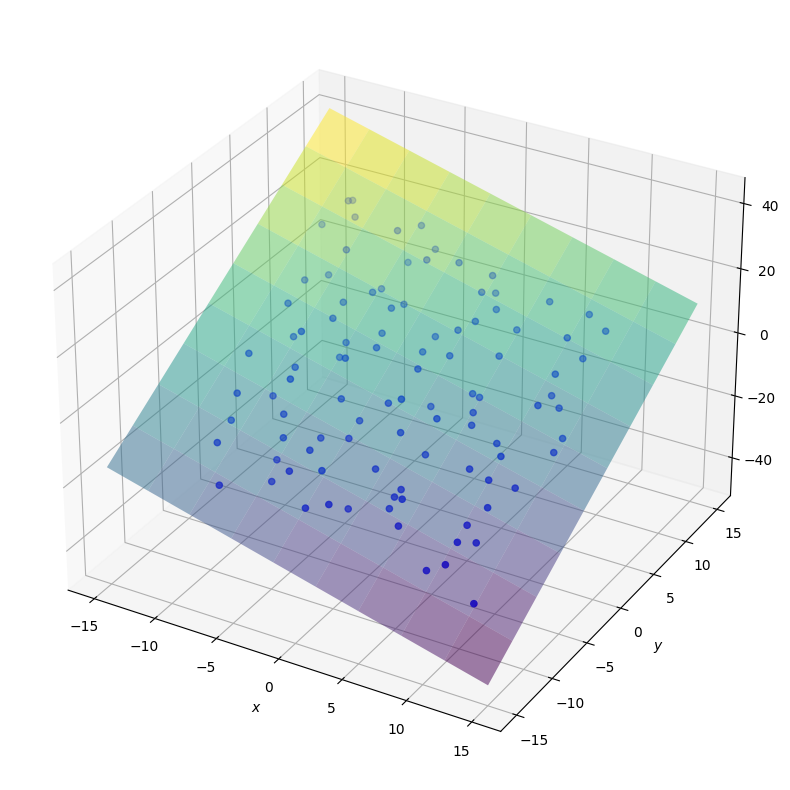

sum of z = -226.586484584474


In [12]:
plot_03()

---
---

# results

---
---


################################################################################
# RESULT # 01
################################################################################



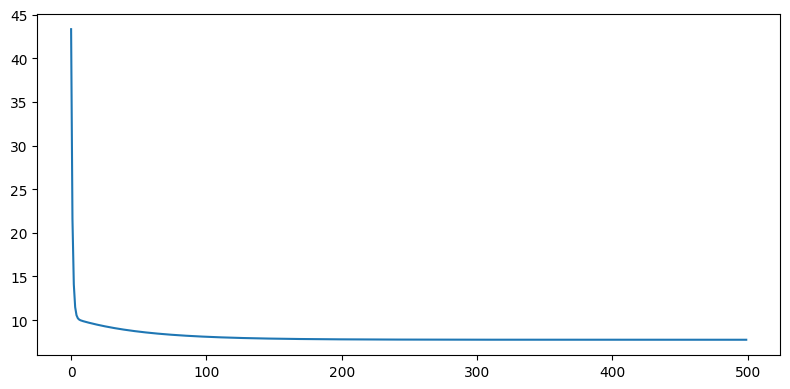

loss sum = 4053.4995897447566

################################################################################
# RESULT # 02
################################################################################



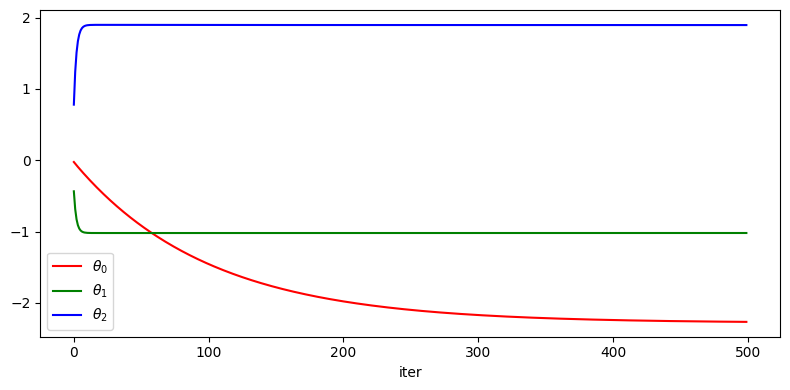

sum theta0 = -916.4012597089699
sum theta1 = -508.5148336164769
sum theta2 = 945.6099519418051

################################################################################
# RESULT # 03
################################################################################



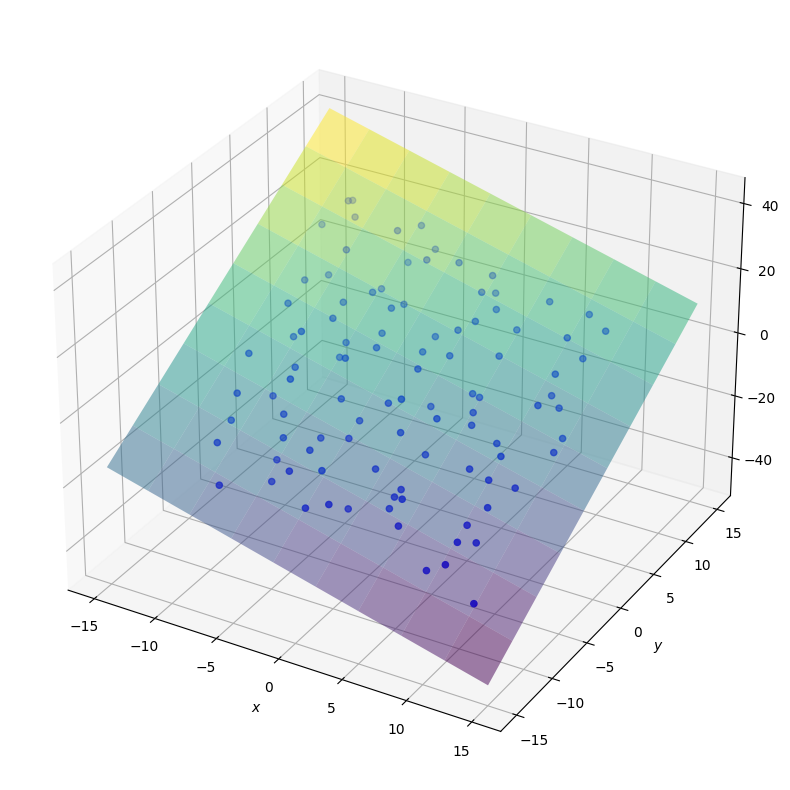

sum of z = -226.586484584474


In [13]:
number_result = 3 

for i in range(number_result):
    title           = '# RESULT # {:02d}'.format(i+1)
    name_function   = 'plot_{:02d}()'.format(i+1)

    print('')
    print('################################################################################')
    print(title)
    print('################################################################################')
    print('') 

    eval(name_function)